<a href="https://colab.research.google.com/github/Pranayc12/Wind-Speed-estimation-using-LSTM/blob/main/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Project BT19MEC022/Dataset/Nagpur.csv")

In [4]:
df.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [33]:
df.describe()
data=df.drop(columns=['snow','snowdepth','feelslikemax','feelslikemin','feelslike','windgust'],axis=1)

In [34]:
data.head()

,name,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,NAGPUR,2019-11-13,28.0,17.0,22.2,15.7,69.5,0.0,0,0.0,...,17.0,7,NaN,2019-11-13T06:22:40,2019-11-13T17:32:49,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,NAGPUR,2019-11-14,28.0,16.0,21.7,14.5,66.3,0.0,0,0.0,...,19.3,8,NaN,2019-11-14T06:23:16,2019-11-14T17:32:31,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
2,NAGPUR,2019-11-15,28.0,16.4,21.8,14.9,67.2,0.0,0,0.0,...,18.5,8,NaN,2019-11-15T06:23:52,2019-11-15T17:32:14,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
3,NAGPUR,2019-11-16,29.0,17.0,22.6,15.5,67.2,0.0,0,0.0,...,18.4,8,NaN,2019-11-16T06:24:29,2019-11-16T17:31:58,0.58,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,NAGPUR,2019-11-17,29.0,17.6,23.0,15.7,66.1,0.0,0,0.0,...,17.4,7,NaN,2019-11-17T06:25:06,2019-11-17T17:31:44,0.63,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"


In [35]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns


Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'moonphase'],
      dtype='object')

In [36]:
correlation = numeric_features.corr()

#examining the correlation of wind speed with other numeric features

print(correlation["windspeed"].sort_values(ascending=False),"\n")







windspeed           1.000000
winddir             0.525735
tempmin             0.461592
temp                0.414937
precipprob          0.350636
cloudcover          0.346611
tempmax             0.328310
precipcover         0.280227
dew                 0.249007
precip              0.197018
visibility          0.158328
solarenergy         0.141892
solarradiation      0.139550
severerisk          0.080499
uvindex             0.068548
moonphase          -0.001563
humidity           -0.001999
sealevelpressure   -0.473134
Name: windspeed, dtype: float64 



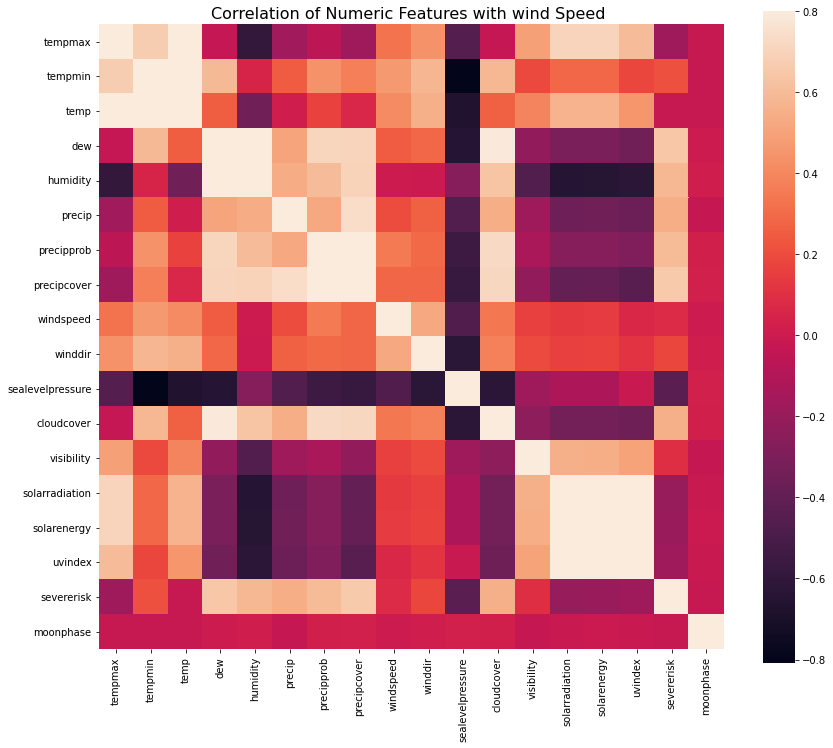

In [37]:
f, ax = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with wind Speed ",y=1,size = 16)
sns.heatmap(correlation,square=True, vmax =0.8)



Index(['windspeed', 'winddir', 'tempmin', 'temp', 'precipprob', 'cloudcover',
       'tempmax', 'precipcover', 'dew', 'precip'],
      dtype='object')


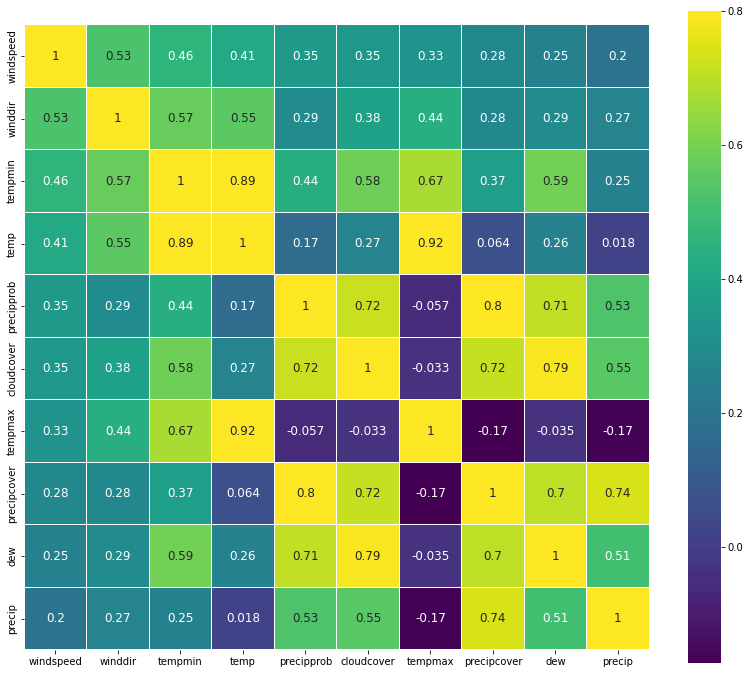

In [38]:
#multi colinearity destroys model performance because of low variance
#choosing top 10 features
k=10
cols = correlation.nlargest(k,'windspeed')['windspeed'].index
print(cols)
#pearson correlation
cm = np.corrcoef(data[cols].values.T)
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor='white',xticklabels=cols.values, annot_kws={"size":12},yticklabels=cols.values)


In [40]:
list_columns = ['winddir','tempmin','temp','precipprob','cloudcover','tempmax','precipcover','dew','precip']
X = data[list_columns]
Y = data['windspeed']


In [51]:
dates = df['datetime']
X_new = pd.concat([X,dates],axis=1)
X_new.head()
X_new.shape


(1000, 10)

In [42]:
Y.shape

(1000,)

In [52]:
X_new.to_csv("X_new.csv")
Y.to_csv("Y.csv")



In [53]:
from google.colab import files
files.download("X_new.csv")

from google.colab import files
files.download("Y.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>